In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from models.cmlp import cMLP
import pickle

In [2]:
cmlp = cMLP(30, lag=1, hidden=[100]).cuda(device='cuda')

In [3]:
cmlp.load_state_dict(torch.load('./saved_models/cmlp_retail_latent.pt'))

<All keys matched successfully>

In [4]:
with open('../data/retail_latent.pickle', 'rb') as f:
        data = pickle.load(f)
X = data['Y']
GC = data['GC']

True variable usage = 6.67%
--------------------------------------------------
Threshold = 0
Estimated variable usage = 82.11%
Accuracy = 23.89%
--------------------------------------------------
Threshold = 0.5
Estimated variable usage = 14.89%
Accuracy = 84.89%


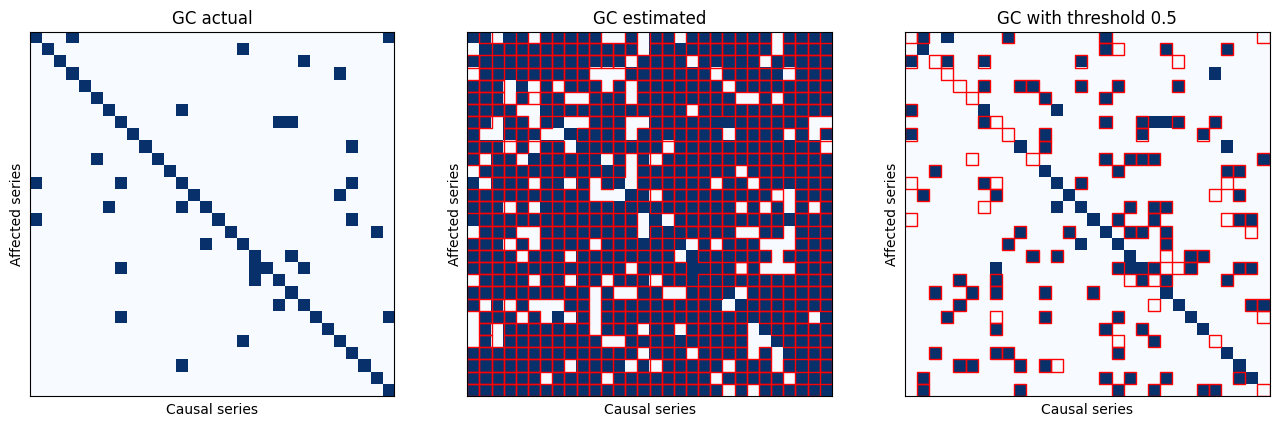

In [7]:
# Verify learned Granger causality
thres = 0.5
GC_est = cmlp.GC().cpu().data.numpy()
GC_thres = cmlp.GC(thres_value=thres).cpu().data.numpy()

print('True variable usage = %.2f%%' % (100 * np.mean(GC)))
print('-'*50)
print('Threshold = 0')
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_est)))
print('Accuracy = %.2f%%' % (100 * np.mean(GC == GC_est)))
print('-'*50)
print(f'Threshold = {thres}')
print(f'Estimated variable usage = %.2f%%' % (100 * np.mean(GC_thres)))
print(f'Accuracy = %.2f%%' % (100 * np.mean(GC == GC_thres)))

# Make figures
fig, axarr = plt.subplots(1, 3, figsize=(16, 10))
axarr[0].imshow(GC, cmap='Blues')
axarr[0].set_title('GC actual')
axarr[0].set_ylabel('Affected series')
axarr[0].set_xlabel('Causal series')
axarr[0].set_xticks([])
axarr[0].set_yticks([])

axarr[1].imshow(GC_est, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_est), len(GC_est), 0))
axarr[1].set_title('GC estimated')
axarr[1].set_ylabel('Affected series')
axarr[1].set_xlabel('Causal series')
axarr[1].set_xticks([])
axarr[1].set_yticks([])

axarr[2].imshow(GC_thres, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_thres), len(GC_thres), 0))
axarr[2].set_title(f'GC with threshold {thres}')
axarr[2].set_ylabel('Affected series')
axarr[2].set_xlabel('Causal series')
axarr[2].set_xticks([])
axarr[2].set_yticks([])

# Mark disagreements
for i in range(len(GC_est)):
    for j in range(len(GC_est)):
        if GC[i, j] != GC_est[i, j]:
            rect = plt.Rectangle((j, i-0.05), 1, 1, facecolor='none', edgecolor='red', linewidth=1)
            axarr[1].add_patch(rect)

for i in range(len(GC_thres)):
    for j in range(len(GC_thres)):
        if GC[i, j] != GC_thres[i, j]:
            rect = plt.Rectangle((j, i-0.05), 1, 1, facecolor='none', edgecolor='red', linewidth=1)
            axarr[2].add_patch(rect)
plt.show()